## prepare dataset path

In [1]:
import yaml
with open("datasets.yaml","r") as f:
    datasets = yaml.safe_load(f)
json_path = datasets['mscoco']['test']['annotation']
import json
with open(json_path,"r") as f:
    anns = json.load(f)

#### get images containing only one person.
- Create a list of the number of persons in each image.
- Retrieve those images with one person

In [2]:
image_ids = [image['id'] for image in anns['images']]
image_id_2_index = {image_id:i for i,image_id in enumerate(image_ids)}

person_numbers = [0]*5000
for ann in anns['annotations']:
    if ann['category_id'] == 1: # personカテゴリなら
        person_numbers[image_id_2_index[ann['image_id']]] +=1

import numpy as np
person_numbers = np.array(person_numbers)
ones = person_numbers==1

image_ids = np.array(image_ids)
ones_ids = image_ids[ones] # これが person 一人しか映っていない画像のid
ones_ids = set(ones_ids)
# ones_ids の画像のannotationだけを保存して使いやすくしておく。

import copy
anns_new = copy.deepcopy(anns)
anns_new['annotations'] = []
for ann in anns['annotations']:
    if ann['image_id'] in ones_ids and ann['category_id'] == 1 :
        anns_new['annotations'].append(ann)

anns_new['images'] = []
for image in anns['images']:
    if image['id'] in ones_ids:
        anns_new['images'].append(image)

save_path="/mnt/c/Users/bt_ga/allpython/DATASET/coco/annotations/5k_one_person.json"
with open(save_path,"w") as f:
    json.dump(anns_new,f)

#### Check images

loading annotations into memory...
Done (t=0.01s)
creating index...
index created!


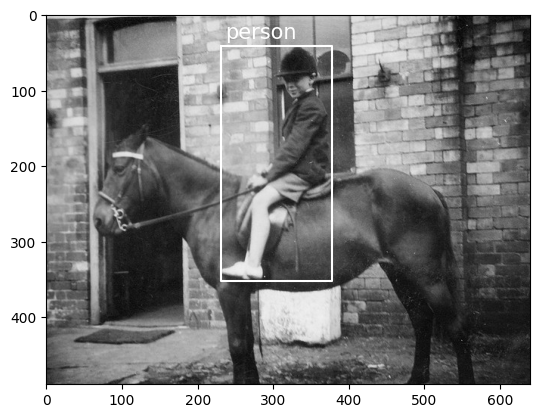

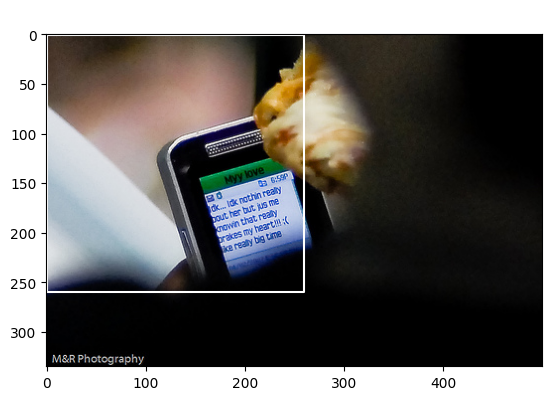

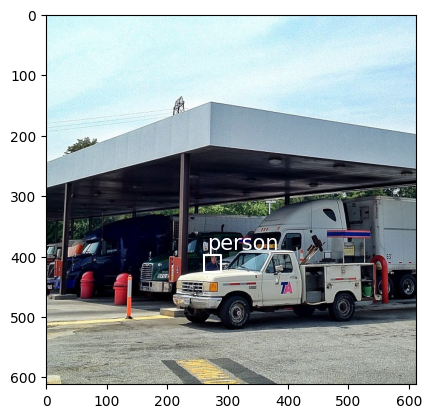

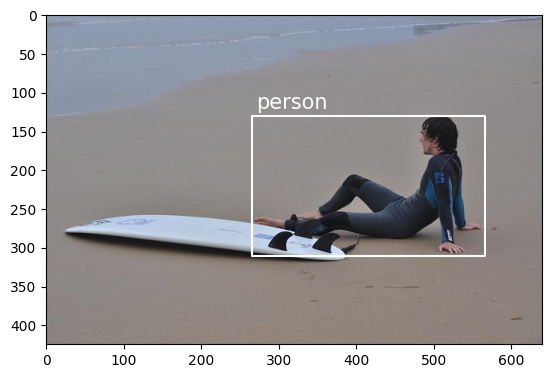

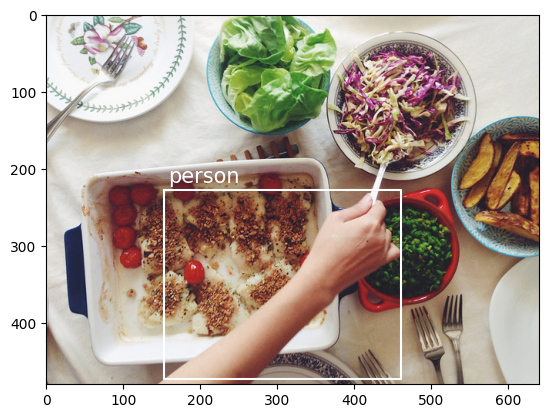

<Figure size 640x480 with 0 Axes>

In [3]:
from TKM.OD import my_cocoapi
img_dir = datasets['mscoco']['test']['image_dir']
my_cocoapi.show_anns(save_path,img_dir,5)

#### Some person is very small. They are difficult to detect at low resolution.